Baseado em "*An Introduction to Statistical Learning with Application in Python*" (Ed. 2), de Gareth James, Daniela Witten, Trevor Hastie e Rob Tibshirani.

**Recursos:** https://www.statlearning.com/resources-python




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercício 8 (Cap. 1)

In [2]:
data = pd.read_csv("https://www.statlearning.com/s/College.csv")

# Renomear a coluna "Unnamed: 0" para "College" e defini-la como coluna de índices (não será tratada como dado)
data = data.rename({"Unnamed: 0": "College"}, axis=1)
data = data.set_index("College")

data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# Descrição numérica da tabela
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


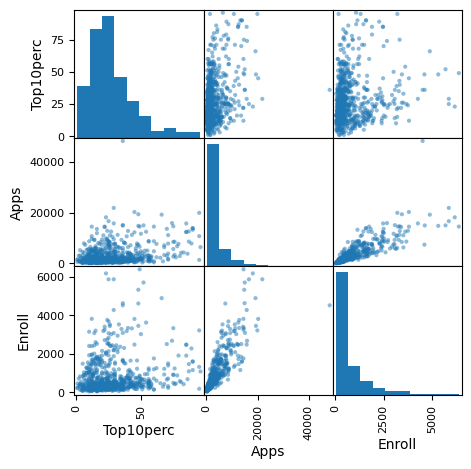

In [4]:
# Produzir uma scatterplot matrix
pd.plotting.scatter_matrix(data[["Top10perc", "Apps", "Enroll"]], figsize=(5,5))
plt.show()

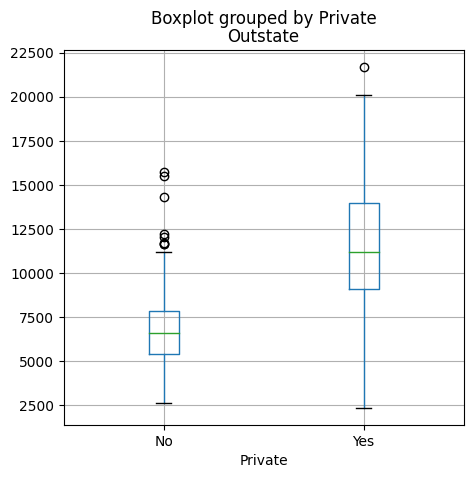

In [5]:
# Produzindo boxplot
data.boxplot(column="Outstate", by="Private", figsize=(5,5))
plt.show()

In [6]:
# Adicionar uma nova coluna que indique se o college é de elite ou não
# Se o número de estudantes oriundos dos 10% melhores high schools, for maior que 50% dos estudantes matriculados, então o college é de elite
data["Elite"] = pd.cut(data.Top10perc/data.Enroll, bins=[0,0.5,1], labels=["No", "Yes"])

print(data["Elite"].value_counts())

# Colleges de elite
data.loc[data["Elite"] == "Yes"][["Enroll", "Top10perc", "Elite"]]

No     775
Yes      2
Name: Elite, dtype: int64


,Enroll,Top10perc,Elite
College,,,
Christendom College,51,33,Yes
Harvey Mudd College,178,95,Yes


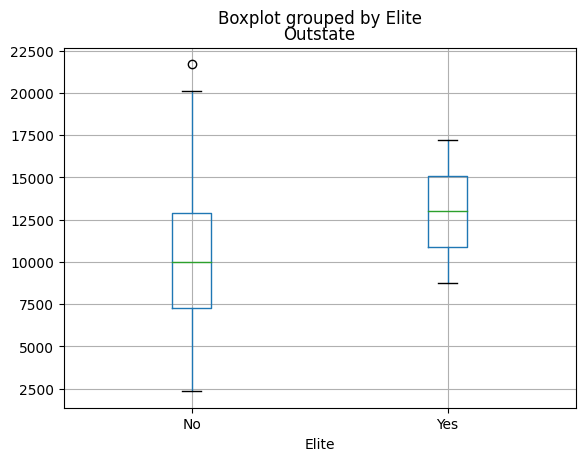

In [7]:
data.boxplot(column="Outstate", by="Elite")
plt.show()

## Exercício 9 (Cap. 1)

In [8]:
auto = pd.read_csv("https://www.statlearning.com/s/Auto.csv", na_values=['?'])

print("Dataframe size:" + str(auto.shape))
auto.head()

Dataframe size:(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
# Checar valores nas colunas, buscando dados ausentes
np.unique(auto["acceleration"])

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.1, 11.2, 11.3, 11.4,
       11.5, 11.6, 12. , 12.1, 12.2, 12.5, 12.6, 12.8, 12.9, 13. , 13.2,
       13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4,
       14.5, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.4, 16.5, 16.6, 16.7, 16.8,
       16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9,
       18. , 18.1, 18.2, 18.3, 18.5, 18.6, 18.7, 18.8, 19. , 19.2, 19.4,
       19.5, 19.6, 19.9, 20.1, 20.4, 20.5, 20.7, 21. , 21.5, 21.7, 21.8,
       21.9, 22.1, 22.2, 23.5, 23.7, 24.6, 24.8])

É possível separar as *features* em dois grupos:



*   **Quantitativos**: mpg, cylinders, dislacement, horsepower, weight, acceleration
*   **Qualitativos**: year, origin



In [10]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


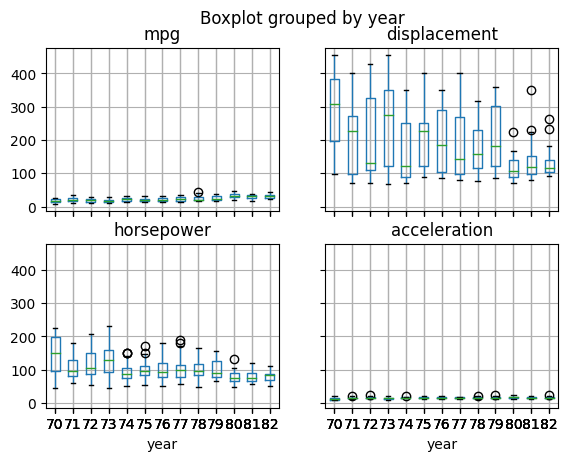

In [11]:
auto.boxplot(column=["mpg","displacement","horsepower","acceleration"], by="year")
plt.show()

In [12]:
q75 = auto["horsepower"].quantile(q=0.75)
q25 = auto["horsepower"].quantile(q=0.25)

maxq = q75 + 1.5*(q75 - q25)

auto.loc[auto["horsepower"] > maxq]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix


In [13]:
auto_new = auto.drop(list(np.arange(9,85)))
auto_new.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,317.000000,321.000000,321.000000,321.000000,321.000000
mean,24.438629,5.370717,187.049844,100.955836,2933.962617,15.723053,77.152648,1.598131
std,7.908184,1.653486,99.635385,35.895567,810.642938,2.680514,3.111230,0.816163
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,115.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


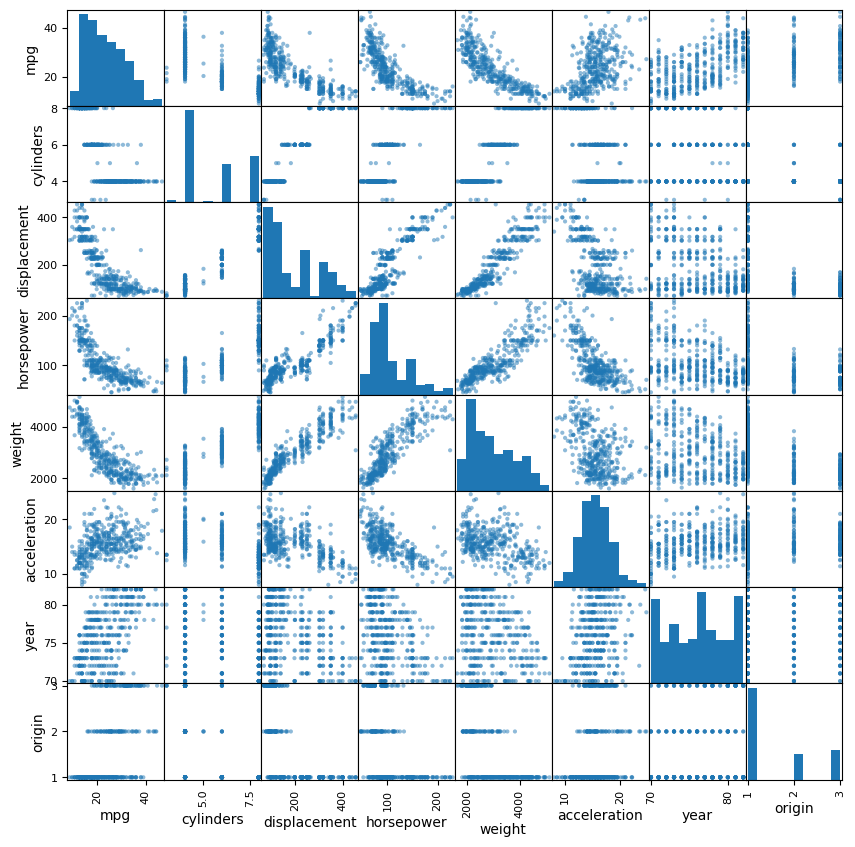

In [14]:
pd.plotting.scatter_matrix(auto, figsize=(10,10))
plt.show()